In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load your CSV dataset
df = pd.read_csv("training_data.csv")  

# Create a new column 'flood_risk' based on '% full'
def categorize_risk(percent_full):
    if percent_full > 75:
        return 'high'
    elif percent_full > 50:
        return 'medium'
    else:
        return 'low'

df['flood_risk'] = df['% full'].apply(categorize_risk)

# Drop target and non-feature columns
columns_to_exclude = ['timestamp', '% full', 'flood_risk']
X = df.drop(columns=[col for col in columns_to_exclude if col in df.columns])

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Encode categorical columns using one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Fill missing values
X = X.fillna(X.median(numeric_only=True))

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['flood_risk'])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Train a Random Forest model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        high       0.29      0.13      0.18        15
         low       0.99      1.00      0.99     21024
      medium       0.97      0.62      0.76       799

    accuracy                           0.99     21838
   macro avg       0.75      0.59      0.64     21838
weighted avg       0.98      0.99      0.98     21838


Confusion Matrix:
[[    2    11     2]
 [    0 21012    12]
 [    5   295   499]]


In [4]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [5]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Proceed with model training using resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

/Users/User/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


RandomForestClassifier(random_state=42)

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encode flood risk labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['flood_risk'])

# Resample the features and labels using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split AFTER SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=42
)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

/Users/User/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00     21023
         low       1.00      1.00      1.00     21023
      medium       1.00      1.00      1.00     21024

    accuracy                           1.00     63070
   macro avg       1.00      1.00      1.00     63070
weighted avg       1.00      1.00      1.00     63070


Confusion Matrix:
[[21022     0     1]
 [    2 20981    40]
 [    7    64 20953]]


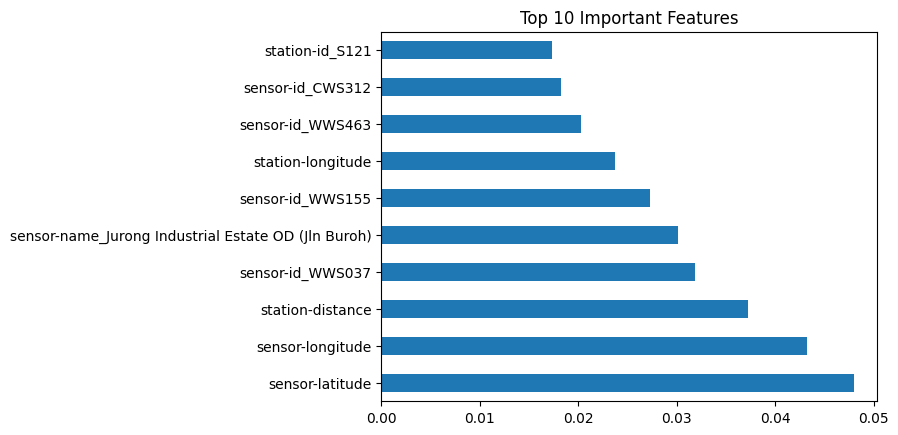

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

In [8]:
import joblib
joblib.dump(model, 'flood_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']